In [8]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.8 MB 2.6 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.8 MB 2.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 3.7 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.8 MB 3.7 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.8 MB 3.7 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.8 MB 3.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 3.2 MB/s eta 0:00:01
   ------------------------- -------------- 1.2/1.8 MB 3.2 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 3.3 MB/s eta 0:00:01
   --------------------------------- ------ 1.5/1.8 MB 3.3 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 3.4 MB/s eta 0:00:01
   ----------------

# Fabricando mapas a partir de localidade de Instituições/Pessoas

Instalando pré-requisitos

In [7]:
pip install adjustText


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --------------- ------------------------ 122.9/323.6 kB 2.4 MB/s eta 0:00:01
   ----------------------------------- ---- 286.7/323.6 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/16.2 MB 5.3 MB/s eta 0:00:04
    --------------------------------------- 0.4/16.2 MB 4.9 MB/s eta 0:00:04
   - -------------------------------------- 0.6/16.2 MB 4.4 MB/s eta 0:00:04
   - -------------------------------------- 0.8/16.2 MB 4.6 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/16.2 MB 4.4 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/16.2 MB 4.5 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/16.2 MB 3.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.4/16.2 MB 4.0 MB/s eta 0:00:04
   


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


# Código para buscar as latitudades e logintudes das cidades/países e inserir na base de dados

In [27]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Carregar os dados da planilha
file_path = 'I Congresso.xlsx'  # Substitua pelo caminho correto
data = pd.read_excel(file_path, sheet_name='Plan1')

# Inicializar o geolocalizador
geolocator = Nominatim(user_agent="institution_mapper")

# Dicionário de capitais (exemplo para alguns países; expandir conforme necessário)
capitais = {
    'Estados Unidos': 'Washington, D.C.',
    'Brasil': 'Brasília',
    'Argentina': 'Buenos Aires',
    # Adicione outros países conforme necessário
}

# Função para obter coordenadas geográficas
def get_coordinates(institution, country):
    try:
        # Verificar se a instituição é governamental
        if any(keyword in institution for keyword in ['Governo', 'Ministério', 'Departamento']):
            location = geolocator.geocode(capitais.get(country, ''))
        else:
            location = geolocator.geocode(f"{institution}, {country}")
        
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

# Aplicar a função para obter coordenadas para cada instituição
data[['Latitude', 'Longitude']] = data.apply(lambda row: pd.Series(get_coordinates(row['Instituição'], row['País'])), axis=1)

# Exibir as primeiras linhas com coordenadas
data.head()

output_path = 'instituicoes_geolocalizadas.xlsx'
data.to_excel(output_path, index=False)

In [ ]:
data #visualizando as localidades

,País,Instituição,Representante(s),Latitude,Longitude
0,Estados Unidos,University of Pittsburgh,Andrew N. Eleven,40.444153,-79.962461
1,Estados Unidos,University of Pennsylvania,Leon B. Frey,39.949340,-75.189649
2,Estados Unidos,University of Northwestern,"William H. Hass, Isaac John Cox",45.034729,-93.169178
3,Estados Unidos,University of Texas,Herman C. James,30.285149,-97.733935
4,Estados Unidos,Princeton University,"Herbert Harris, R. C. Valento",40.338675,-74.658365
5,Estados Unidos,Harvard University,"Edwin V. Morgan, Jesse Knight, Ch. Chandler",42.365743,-71.122214
6,Estados Unidos,Stanford University,"Percy Martin, Alfred Coester, Horace Williams",37.431314,-122.169365
7,Estados Unidos,University of California,William Lytle Schurz,37.875500,-122.239069
8,Estados Unidos,Smithsonian Institution,Walter Hough,38.888795,-77.025938
9,Estados Unidos,Florida Historical Society,Charles Lyon Chandler,41.330809,-74.355644


Mapa em escala de cinza

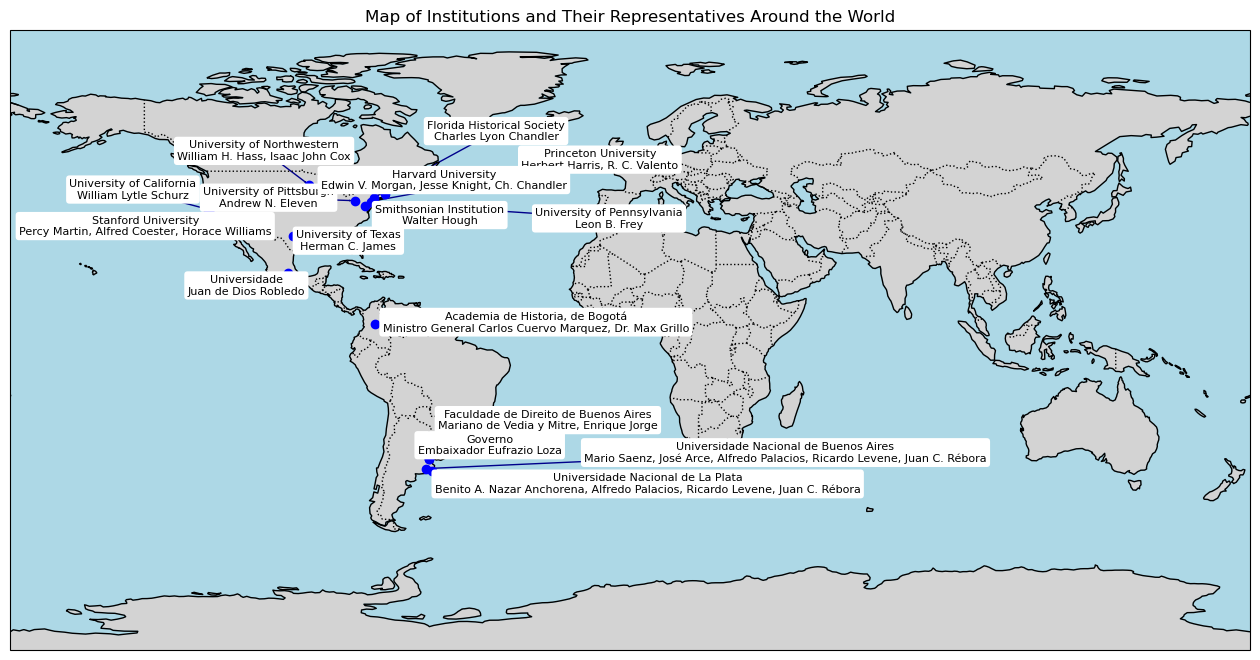

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from adjustText import adjust_text

# Carregar os dados do arquivo Excel e remover linhas vazias
file_path = 'instituicoes_geolocalizadas.xlsx'  # Substitua pelo caminho correto do arquivo
data = pd.read_excel(file_path)
data = data.dropna(subset=['Instituição', 'Latitude', 'Longitude'])  # Filtrar linhas com valores NaN nas colunas importantes

# Criando o mapa global
fig, ax = plt.subplots(figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # Definindo o mapa para o globo inteiro

# Adicionando elementos do mapa com cores personalizadas
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='#d3d3d3')  # Cor mais clara para a terra
ax.add_feature(cfeature.OCEAN, color='lightblue')  # Cor diferente para o oceano

# Lista para armazenar os textos (legendas)
texts = []

# Adicionando pontos das instituições e preparando as legendas com tarjas e setas
for _, row in data.iterrows():
    lat, lon, inst, rep = row['Latitude'], row['Longitude'], row['Instituição'], row['Representante(s)']
    
    # Ponto de localização
    ax.plot(lon, lat, 'bo', markersize=6, transform=ccrs.PlateCarree())
    
    # Adicionando o texto com uma tarja de fundo para destaque
    text = ax.text(
        lon, lat, f"{inst}\n{rep}", 
        fontsize=8, ha="center", va="center", color="black",
        bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"),  # Tarja branca atrás do texto
        transform=ccrs.PlateCarree()
    )
    texts.append(text)  # Armazena o texto para ajuste posterior

# Ajustar automaticamente para evitar sobreposição com setas diferenciadas
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color="darkblue"))  # Setas em azul-escuro

plt.title("Map of Institutions and Their Representatives Around the World")
plt.show()


Mapa colorido

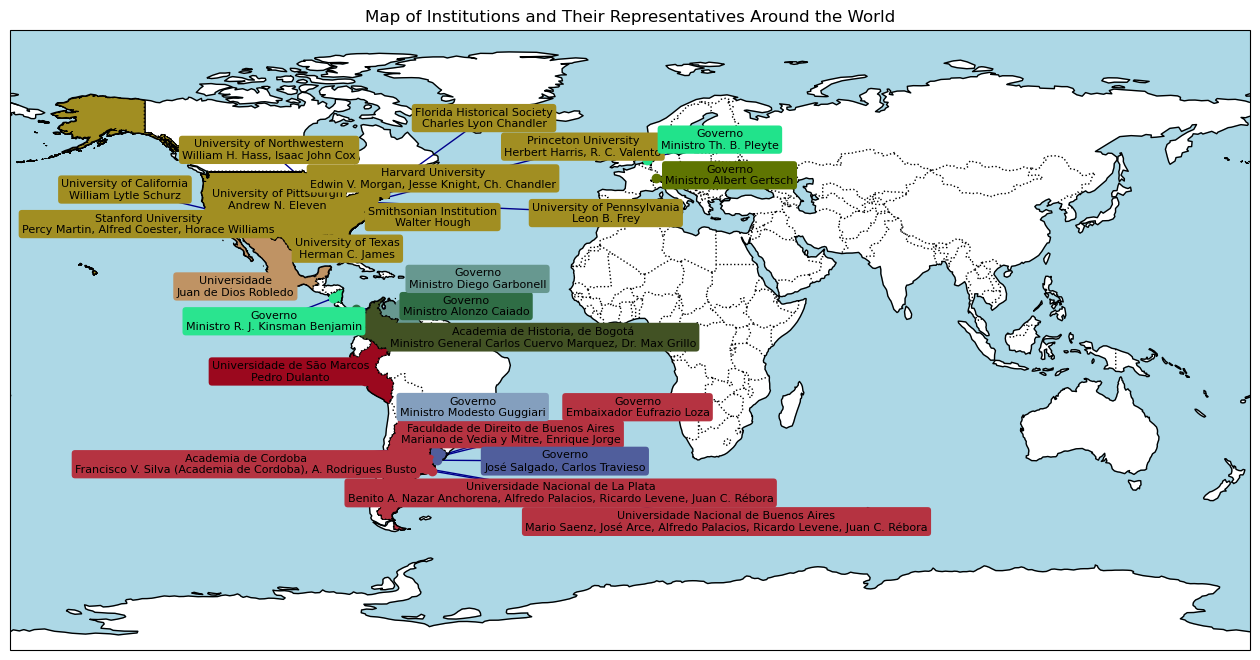

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from adjustText import adjust_text
from shapely.geometry import Point, Polygon, MultiPolygon
import random

# Carregar os dados do arquivo Excel e remover linhas vazias
file_path = 'instituicoes_geolocalizadas.xlsx'  # Substitua pelo caminho correto do arquivo
data = pd.read_excel(file_path)
data = data.dropna(subset=['Instituição', 'Latitude', 'Longitude'])  # Filtrar linhas com valores NaN nas colunas importantes

# Função para gerar cores aleatórias
def random_color():
    return "#%06x" % random.randint(0, 0xFFFFFF)

# Criando o mapa global
fig, ax = plt.subplots(figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # Definindo o mapa para o globo inteiro

# Dicionário para armazenar as cores dos países com instituições
country_colors = {}

# Iterar sobre as geometrias dos países para verificar se uma instituição está localizada neles
countries = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m')
for country_geom in countries.geometries():
    for _, row in data.iterrows():
        lat, lon = row['Latitude'], row['Longitude']
        point = Point(lon, lat)
        
        # Verifica se é um polígono simples ou múltiplo
        if isinstance(country_geom, Polygon):
            if country_geom.contains(point):
                color = random_color()
                country_colors[country_geom] = color
                ax.add_geometries([country_geom], ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.5)
                break
        elif isinstance(country_geom, MultiPolygon):
            # Verificar cada polígono no MultiPolygon usando .geoms
            for sub_geom in country_geom.geoms:
                if sub_geom.contains(point):
                    color = random_color()
                    country_colors[country_geom] = color
                    ax.add_geometries([country_geom], ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.5)
                    break

# Adicionando elementos do mapa sem alterar os oceanos
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, color='lightblue')  # Cor para o oceano

# Lista para armazenar os textos (legendas)
texts = []

# Adicionando pontos das instituições e preparando as legendas com tarjas e setas
for _, row in data.iterrows():
    lat, lon, inst, rep = row['Latitude'], row['Longitude'], row['Instituição'], row['Representante(s)']
    
    # Encontrar a cor do país em que a instituição está localizada
    country_color = "blue"  # Cor padrão caso não seja possível encontrar o país
    for country_geom, color in country_colors.items():
        if country_geom.contains(Point(lon, lat)):
            country_color = color
            break

    # Ponto de localização
    ax.plot(lon, lat, 'o', color=country_color, markersize=6, transform=ccrs.PlateCarree())
    
    # Adicionando o texto com uma tarja de fundo para destaque e com a cor do país
    text = ax.text(
        lon, lat, f"{inst}\n{rep}", 
        fontsize=8, ha="center", va="center", color="black",
        bbox=dict(facecolor=country_color, edgecolor="none", boxstyle="round,pad=0.3"),  # Tarja colorida com a cor do país
        transform=ccrs.PlateCarree()
    )
    texts.append(text)  # Armazena o texto para ajuste posterior

# Ajustar automaticamente para evitar sobreposição com setas, posicionando as legendas fora do mapa
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color="darkblue"))

plt.title("Map of Institutions and Their Representatives Around the World")
plt.show()


29 [-0.30531062  0.83450606]
30 [ 0.05273154 -0.87760981]
12 [0.09712791 0.06337445]
17 [-0.23463167 -0.42128194]
18 [-0.01309837  0.98207182]
26 [ 0.52705001 -0.56634992]
27 [-0.7783282  -0.57354419]


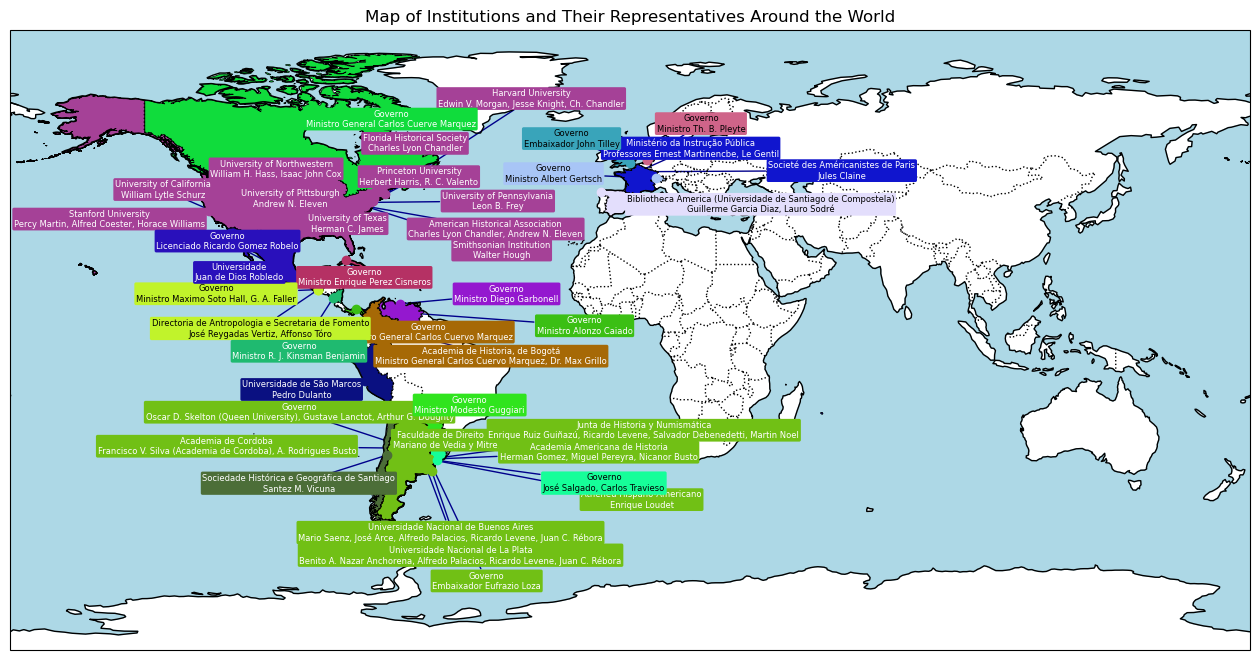

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from adjustText import adjust_text
from shapely.geometry import Point, Polygon, MultiPolygon
import random

# Carregar os dados do arquivo Excel e remover linhas vazias
file_path = 'instituicoes_geolocalizadas.xlsx'  # Substitua pelo caminho correto do arquivo
data = pd.read_excel(file_path)
data = data.dropna(subset=['Instituição', 'Latitude', 'Longitude'])  # Filtrar linhas com valores NaN nas colunas importantes

# Função para gerar cores aleatórias
def random_color():
    return "#%06x" % random.randint(0, 0xFFFFFF)

# Função para verificar se uma cor é escura
def is_dark(color_hex):
    color_hex = color_hex.lstrip('#')
    rgb = tuple(int(color_hex[i:i+2], 16) for i in (0, 2, 4))
    return sum(rgb) < 382  # Se a soma de RGB for menor que 382, consideramos a cor como "escura"

# Criando o mapa global
fig, ax = plt.subplots(figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # Definindo o mapa para o globo inteiro

# Dicionário para armazenar as cores dos países com instituições
country_colors = {}

# Iterar sobre as geometrias dos países para verificar se uma instituição está localizada neles
countries = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m')
for country_geom in countries.geometries():
    for _, row in data.iterrows():
        lat, lon = row['Latitude'], row['Longitude']
        point = Point(lon, lat)
        
        # Verifica se é um polígono simples ou múltiplo
        if isinstance(country_geom, Polygon):
            if country_geom.contains(point):
                color = random_color()
                country_colors[country_geom] = color
                ax.add_geometries([country_geom], ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.5)
                break
        elif isinstance(country_geom, MultiPolygon):
            # Verificar cada polígono no MultiPolygon usando .geoms
            for sub_geom in country_geom.geoms:
                if sub_geom.contains(point):
                    color = random_color()
                    country_colors[country_geom] = color
                    ax.add_geometries([country_geom], ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.5)
                    break

# Adicionando elementos do mapa sem alterar os oceanos
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, color='lightblue')  # Cor para o oceano

# Lista para armazenar os textos (legendas)
texts = []

# Adicionando pontos das instituições e preparando as legendas com tarjas e setas
for _, row in data.iterrows():
    lat, lon, inst, rep = row['Latitude'], row['Longitude'], row['Instituição'], row['Representante(s)']
    
    # Encontrar a cor do país em que a instituição está localizada
    country_color = "blue"  # Cor padrão caso não seja possível encontrar o país
    for country_geom, color in country_colors.items():
        if country_geom.contains(Point(lon, lat)):
            country_color = color
            break
    
    # Determinar a cor da fonte com base na cor do balão
    font_color = "white" if is_dark(country_color) else "black"
    
    # Ponto de localização
    ax.plot(lon, lat, 'o', color=country_color, markersize=6, transform=ccrs.PlateCarree())
    
    # Adicionando o texto com uma tarja de fundo menor e ajustada
    text = ax.text(
        lon, lat, f"{inst}\n{rep}", 
        fontsize=6, ha="center", va="center", color=font_color,  # Fonte menor e cor adaptativa
        bbox=dict(facecolor=country_color, edgecolor="none", boxstyle="round,pad=0.2"),  # Tarja com menos padding
        transform=ccrs.PlateCarree()
    )
    texts.append(text)  # Armazena o texto para ajuste posterior

# Ajustar automaticamente para evitar sobreposição com setas, posicionando as legendas fora do mapa
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color="darkblue"))

plt.title("Map of Institutions and Their Representatives Around the World")
plt.show()
